# Graduate Numerical Analysis Course Project

Liu Zhao hong

ID: 122413910061

## 0. Python Classes

**0.1 Least square**

In [84]:
class LeastSquare:
    # constructor function maybe
    def __init__(self, points):
        # points should be a numpy array
        self.points = points
        self.x = points[:, 0]
        self.y = points[:, 1]
        # or len(points) here
        self.n = points.shape[0]
        self.m_max = self.n-2  # m < n-1

    # set m_max manually
    def set_m_max(self, max):
        self.m_max = max

    # fitting function
    # return a function
    def get_fitting_function(self, m):
        # check the m
        if m < 1:
            raise Exception("Invaild m<1, please check the m you choose!")

        A = np.ones((self.n, 1))

        for i in range(1, m+1):
            A_plus = np.power(self.x, i).reshape(self.n, 1)
            A = np.hstack((A, A_plus))

        # print(A)

        Y = self.y.reshape(self.n, 1)
        coef = np.linalg.inv(np.matmul(A.transpose(), A))
        coef = np.matmul(coef, A.transpose())
        coef = np.matmul(coef, Y)
        coef = coef.flatten()

        return coef

    def coef2function_value(self, coef, x):
        func = np.poly1d(coef)
        return func(x)

    def run(self):
        x_new = np.linspace(points[0, 0], points[self.n-1, 0], num=100)
        m_range = np.arange(1, self.m_max+1)  # from 1 to m_max, have to add 1 here

        # define labes list for matplotlib.pyplot
        m_values =  ["m value={}".format(m) for m in m_range]

        # from 1 to m_max run the fitting process
        for i in range(1, self.m_max + 1):
            coef = self.get_fitting_function(i)

            y_estimated = self.coef2function_value(np.flip(coef), x_new)
            plt.plot(x_new, y_estimated, label=m_values[i-1])

        plt.scatter(self.x, self.y, label="original data")

        plt.xlabel("x")
        plt.ylabel("y")
        plt.title("least square fitting on different m")
        plt.legend()
        plt.show()

    def fit_determined_m(self, m):
        x_new = np.linspace(points[0, 0], points[self.n-1, 0], num=100)
        coef = self.get_fitting_function(m)

        y_estimated = self.coef2function_value(np.flip(coef), x_new)

        plt.scatter(self.x, self.y, label="original data")
        plt.plot(x_new, y_estimated, label="m value=%d" %(m))

        plt.xlabel("x")
        plt.ylabel("y")
        plt.title("least square fitting on m=%d" %(m))
        plt.legend()
        plt.show()

    def get_function_m(self, m):
        coef = self.get_fitting_function(m)
        return coef

**0.2 Numerical integration**

In [85]:
class NumericalIntegration:
    def __init__(self, function):
        self.f = function

    def closed_newton_cotes(self, x_start, x_end):
        # n from 1 to 4
        # integration from x_start to x_end

        # results
        final = []

        # Trapezoidal rule, n = 1
        final1 = (x_end - x_start) / 2 * (self.f(x_end) + self.f(x_start))
        final.append(final1)

        # Simpson's rule, n = 2
        a = x_start
        b = x_end
        h = (b - a) / 2
        final2 = h / 3 * (self.f(a) + 4 * self.f((a + b) / 2) + self.f(b))
        final.append(final2)

        # Simpson's Three Eight rule, n = 3
        h = (b - a) / 3
        final3 = 3 * h / 8 * (self.f(a) + 3 * self.f(a + h) + 3 * self.f(b - h) + self.f(b))
        final.append(final3)

        # Rank 4, n = 4
        h = (b - a) / 4
        final4 = 2 * h / 45 * (
                7 * self.f(a) + 32 * self.f(a + h) + 12 * self.f(a + 2 * h) + 32 * self.f(b - h) + 7 * self.f(b))
        final.append(final4)

        print(final)

    def open_newton_cotes(self, x_start, x_end):
        # n from 0 to 3
        a = x_start
        b = x_end
        final = []

        # n = 0, Midpoint rule
        n = 0
        h = (b - a) / (n + 2)
        final1 = 2 * h * self.f(a + h)
        final.append(final1)

        # n = 1
        n = 1
        h = (b - a) / (n + 2)
        final2 = 3 * h / 2 * (self.f(a + h) + self.f(b - h))
        final.append(final2)

        # n = 2
        n = 2
        h = (b - a) / (n + 2)
        final3 = 4 * h / 3 * (2 * self.f(a + h) - self.f(a + 2 * h) + 2 * self.f(b - h))
        final.append(final3)

        # n = 3
        n = 3
        h = (b - a) / (n + 2)
        final4 = 5 * h / 24 * (11 * self.f(a + h) + self.f(a + 2 * h) + self.f(b - 2 * h) + 11 * self.f(b - h))
        final.append(final4)

        print(final)

    def composite_newton_cotes(self, x_start, x_end, n):
        a = x_start
        b = x_end
        final = []

        # for Trapezoidal rule
        h = (b - a) / n
        sum = 0
        for i in range(1, n - 1 + 1, 1):
            # range(1, n+1) is from 1 to n
            sum += 2 * self.f(a + i * h)
        sum = sum + self.f(a) + self.f(b)
        final1 = h / 2 * sum
        final.append(final1)

        # for Simpson's rule
        if n % 2 != 0:
            raise Exception('n is not an even number, not for composite Simpsons rule')

        h = (b - a) / n
        xi0 = self.f(a) + self.f(b)
        xi1 = 0
        xi2 = 0
        for j in range(1, int(n / 2 - 1) + 1, 1):
            xi1 += self.f(a + 2 * j * h)
        for j in range(1, int(n / 2) + 1, 1):
            xi2 += self.f(a + (2 * j - 1) * h)

        final2 = h / 3 * (xi0 + 2 * xi1 + 4 * xi2)
        final.append(final2)

        print(final)

    def romberg(self, x_start, x_end, n):
        # Romberg Integration
        romberg_matrix = np.zeros((n, n))

        # init parameters
        a = x_start
        b = x_end
        h = b - a
        temp_sum = 0

        # R11 should be defined before circle
        r11 = h / 2 * (self.f(a) + self.f(b))
        romberg_matrix[0][0] = r11

        # fill the first column of matrix
        # define k from 2 to n
        for k in range(2, n + 1, 1):
            # define i from 1 to 2^(k-2)
            for i in range(1, int(np.power(2, k - 2)) + 1, 1):
                # i = 1, temp_sum = f((a+b)/2)
                # ...
                # i = 2^(k-2), temp_sum = f(a+(k-0.5)hk)
                temp_sum += self.f(a + (2 * i - 1) * (b - a) / (np.power(2, k - 1)))

            # be advised that h is being updated with time
            rn1 = 0.5 * romberg_matrix[(k - 1) - 1][0] + 0.5 * (b - a) / (np.power(2, k - 2)) * temp_sum
            romberg_matrix[(k - 1)][0] = rn1

            # update template variable to 0 for the next trial
            temp_sum = 0

        # it seems obvious that rest elements of the matrix can be calculated
        # get R_{j, k} here, noted that k and j is more than 1, k >= j
        # define j from 2 to n
        for j in range(2, n + 1, 1):
            # define k from j to n
            for k in range(j, n + 1, 1):
                r_kj = romberg_matrix[k - 1][j - 2]
                r_kj += 1 / (np.power(4, j - 1) - 1) * (romberg_matrix[k - 1][j - 2] - romberg_matrix[k - 2][j - 2])
                # transfer data to matrix
                romberg_matrix[k - 1][j - 1] = r_kj

        print(romberg_matrix)

    def simpson(self, x_start, x_end):
        a = x_start
        b = x_end
        h = (b - a) / 2

        result = self.f(a) + self.f(b) + 4 * self.f(a + h)
        result = h / 3 * result
        return result

    def trapezoidal(self, x_start, x_end):
        a = x_start
        b = x_end
        h = (b - a) / 2

        return h * (self.f(a) + self.f(b))

    def adaptive_simpson(self, x_start, x_end, eps):
        # reference
        # https://en.wikipedia.org/wiki/Adaptive_Simpson%27s_method
        # https://cloud.tencent.com/developer/article/1637426
        # https://www.math.usm.edu/lambers/mat460/fall09/lecture30.pdf
        a = x_start
        b = x_end
        m = (a + b) / 2

        simpson_ans = self.simpson(a, b)
        left = self.simpson(a, m)
        right = self.simpson(m, b)
        print("ans of simpson's method on [%f, %f] is %f" % (a, b, simpson_ans))
        print("ans of simpson's method on [%f, %f] is %f" % (a, m, left))
        print("ans of simpson's method on [%f, %f] is %f" % (m, b, right))
        print("error is %f" % (abs(left + right - simpson_ans)))

        # a traditional way is to replace 15 by 10
        # to make the algorithm more conservative
        # seems a serious bug due to no limitation
        if abs(left + right - simpson_ans) <= 15 * eps:
            print("[%f, %f] meet the error" % (a, b))
            return left + right + (left + right - simpson_ans) / 15
        else:
            print("[%f, %f] exceed the error" % (a, b))
            return self.adaptive_simpson(a, m, eps / 2) + \
                self.adaptive_simpson(m, b, eps / 2)

    def adaptive_trapezoidal(self, x_start, x_end, eps):
        a = x_start
        b = x_end
        m = (a + b) / 2

        trapezoidal_ans = self.trapezoidal(a, b)
        left = self.trapezoidal(a, m)
        right = self.trapezoidal(m, b)
        print("ans of trapezoidal method on [%f, %f] is %f" % (a, b, trapezoidal_ans))
        print("ans of trapezoidal method on [%f, %f] is %f" % (a, m, left))
        print("ans of trapezoidal method on [%f, %f] is %f" % (m, b, right))
        print("error is %f" % (abs(left + right - trapezoidal_ans)))

        if abs(left + right - trapezoidal_ans) <= 15 * eps:
            print("[%f, %f] meet the error" % (a, b))
            return left + right + (left + right - trapezoidal_ans) / 15
        else:
            print("[%f, %f] exceed the error" % (a, b))
            return self.adaptive_trapezoidal(a, m, eps / 2) + \
                self.adaptive_trapezoidal(m, b, eps / 2)

**0.3 ODE solver**

In [86]:
class ODESolver:
    def __init__(self, df):
        """init function
        :param df need to be a function with 2 params, like f(t, y)"""
        self.df = df  # df is the derivative function (rank 1, 一阶导数)

    def forward_euler(self, init_y, start, end, len_step):
        """compose forward euler method for a well-posed initial value problem
        :param init_y the function value at start point, namely y(start)
        :param start the value of left interval
        :param end the value of right interval
        :param len_step the length of step"""

        if end <= start:
            raise Exception('Error! Bad interval input')

        num_steps = int((end - start) / len_step)
        # init t and w in f(t, w), avoid using y for misunderstanding
        t = start
        w = init_y
        print("w0 = %f" % w)

        for i in range(num_steps):
            w += len_step * self.df(t, w)
            t += len_step
            index = int(i + 1)
            print("w%d = %f" % (index, w))

        return w

    def two_order_taylor(self, d2f, init_y, start, end, num_step):
        """compose forward euler method for a well-posed initial value problem
        :param d2f f'(t, w)
        :param init_y the function value at start point, namely y(start)
        :param start the value of left interval
        :param end the value of right interval
        :param num_step the number of step"""

        if end <= start:
            raise Exception('Error! Bad interval input')

        len_step = (end - start) / num_step
        # init t and w in f(t, w), avoid using y for misunderstanding
        t = start
        w = init_y
        print("w0 = %f" % w)

        for i in range(num_step):
            w += len_step * (self.df(t, w) + len_step / 2 * d2f(t, w))
            t += len_step
            index = i + 1
            print("w%d = %f" % (index, w))
        return w

    def modified_euler(self, init_y, start, end, num_step):
        len_step = (end - start) / num_step
        t = start
        w = init_y

        for i in range(num_step):
            k0 = len_step * self.df(t, w)
            k1 = len_step * self.df(t + len_step, w + k0)
            w = w + (k0 + k1) / 2.0
            t = t + len_step

        return w

    def runge_kutta_4(self, init_y, start, end, num_step):
        len_step = (end - start) / num_step
        t = start
        w = init_y

        for i in range(num_step):
            k0 = len_step * self.df(t, w)
            k1 = len_step * self.df(t + len_step / 2.0, w + k0 / 2.0)
            k2 = len_step * self.df(t + len_step / 2.0, w + k1 / 2.0)
            k3 = len_step * self.df(t + len_step, w + k2)
            w = w + (k0 + 2.0 * k1 + 2.0 * k2 + k3) / 6.0
            t = t + len_step

        return w

**0.4 Non linear equations root finder**

In [87]:
class RootFinder:
    def __init__(self, func):
        self.f = func

    def bisect(self, start, end, tolerance):
        k = 1
        if self.f(start) * self.f(end) < 0:
            while abs(start - end) / 2.0 > tolerance:
                k = k + 1
                x_new = float(start + end) / 2.0
                if self.f(start) * self.f(x_new) < 0:
                    end = x_new
                else:
                    start = x_new
        else:
            print("f(a)*f(b) is non-negative, find another pair of input")
        return float(start + end) / 2.0, k

    def newton(self, df, x0, max_iter, tolerance):
        for i in range(max_iter):
            x1 = x0 - self.f(x0) / df(x0)
            if abs((x1 - x0) < tolerance):
                break
            if i == max_iter:
                print("meet max iter!")
            x0 = x1

        return x0

    def fix_point(self, x0, tolerance):
        x1 = self.f(x0)
        while abs(x0 - x1) > tolerance:
            x0 = self.f(x1)
            x1 = self.f(x0)

        return x1

**0.5 Lagrange interpolation**

In [88]:
from fractions import Fraction

def multiply(a, b, m, n):
    prod = [0] * (m + n - 1)

    # Multiply two polynomials term by term

    # Take ever term of first polynomial
    for i in range(m):

        # Multiply the current term of first
        # polynomial with every term of
        # second polynomial.
        for j in range(n):
            prod[i + j] += a[i] * b[j]

    return prod


def print_poly(poly, n):
    for i in range(n):
        print(poly[i], end="")
        if i != 0:
            print("x^%d" % i, end="")
        if i != n - 1:
            print(" + ", end="")

class LagrangeSolver:
    def __init__(self, np_points):
        self.points = np_points
        # get rows and cols of points
        self.rows = self.points.shape[0]
        self.cols = self.points.shape[1]
        # check the dimension of the array (points)
        if self.cols != 2:
            print("considering using reshape() to revise your points")
            raise Exception("Error! The column number of your points \
            array is not 2, please check it out!")

    def change_data(self, new_np_points):
        new_cols = new_np_points.shape[1]
        # check the dimension of the array (points)
        if new_cols != 2:
            print("considering using reshape() to revise your points")
            raise Exception("Error! The column number of your points \
            array is not 2, please check it out!")
        # send data to self
        self.points = new_np_points
        self.rows = new_np_points.shape[0]
        self.cols = new_np_points.shape[1]

    def get_lagrange_den(self, index):
        point = self.points
        length = self.rows

        den = 1
        for i in range(length):
            if index != i:
                den = den * (point[index, 0] - point[i, 0])

        return den

    def get_lagrange_num(self, index):
        length = self.rows

        prod = [1]

        # start from the highest rank, which is len - 1
        for i in range(length):
            if i != index:
                m = len(prod)
                n = 2
                b = [-self.points[i, 0], 1]
                prod = multiply(prod, b, m, n)

        return prod

    def lagrange_interpolation(self):
        length = self.rows
        coefficient_list = []
        # get coefficient
        for i in range(length):
            coefficient = Fraction(1 / self.get_lagrange_den(i)).limit_denominator() \
                   * Fraction(self.points[i, 1]).limit_denominator()
            coefficient_list.append(coefficient)

        print("coefficients: ", coefficient_list)

        final = [Fraction(0, 1)] * length

        # get nums
        print("each polynomial without coefficients: ")
        for i in range(length):
            # on index
            num = self.get_lagrange_num(i)
            print_poly(num, length)
            print(" ")
            for j in range(length):
                final[j] += Fraction(num[j]).limit_denominator() * coefficient_list[i]

        return final

    def lagrange_polynomial(self):
        final = self.lagrange_interpolation()
        print("final polynomial: ")
        print_poly(final, self.rows)

## 1. Numerical Integration

$$
\int_0^R \rho v2 \pi r {\rm d}r
$$

$\rho =1.2kg/m^3$

change unit to $cm$ in $r$, use scatter to see the relation between $r$ and $v$

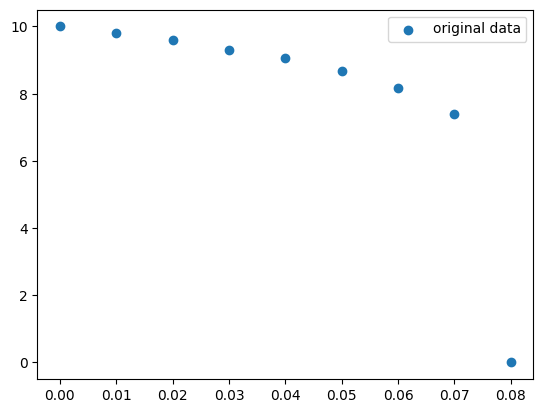

In [89]:
import numpy as np
import matplotlib.pyplot as plt

r_sample = np.array([0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08])
v_sample = np.array([10, 9.8, 9.6, 9.3, 9.06, 8.68, 8.18, 7.41, 0])

plt.scatter(r_sample, v_sample, label="original data")
plt.legend()
plt.show()

then using numerical interpolation to get a polynomial

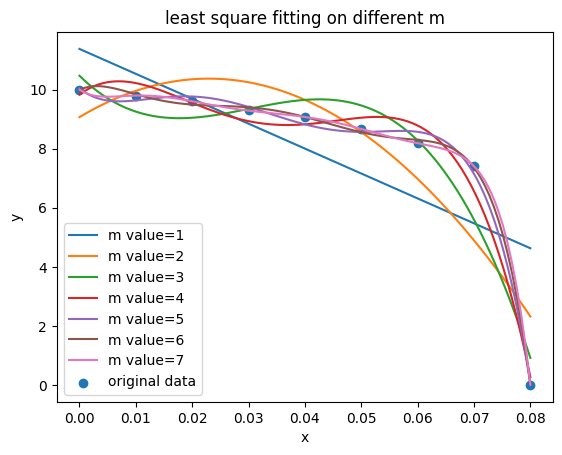

In [90]:
points = np.vstack((r_sample, v_sample)).transpose()

# v_sample_ln = np.log(v_sample)
# points_ln = np.vstack((r_sample, v_sample_ln)).transpose()
# points_ln[8][1] = 0.001

solver = LeastSquare(points)
solver.run()

# get the v(r) function
coefficient = solver.get_function_m(5)

# apply our formula
coefficient = np.insert(coefficient, 0, 0)  # vr
coefficient = coefficient * 1.2 * 2 * 3.1415926  # vr * rho * 2 * pi

use the function created by LeastSquare, order 5

In [91]:
function1 = np.poly1d(np.flip(coefficient))
integration1 = NumericalIntegration(function1)
integration1.composite_newton_cotes(0, 0.08, 50)

[0.18532954315398195, 0.18550181676722577]


so the answer is:
* Composite Trapezoidal rule: 0.1853
* Composite Simpson's rule: 0.1855

if we use romberg method

In [92]:
more_accurate_ans = integration1.romberg(0, 0.08, 10)

[[0.00139815 0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.10716038 0.14241446 0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.16058675 0.17839555 0.18079428 0.         0.         0.
  0.         0.         0.         0.        ]
 [0.17888847 0.18498904 0.18542861 0.18550217 0.         0.
  0.         0.         0.         0.        ]
 [0.18382388 0.18546902 0.18550102 0.18550217 0.18550217 0.
  0.         0.         0.         0.        ]
 [0.18508103 0.18550008 0.18550215 0.18550217 0.18550217 0.18550217
  0.         0.         0.         0.        ]
 [0.18539679 0.18550204 0.18550217 0.18550217 0.18550217 0.18550217
  0.18550217 0.         0.         0.        ]
 [0.18547582 0.18550216 0.18550217 0.18550217 0.18550217 0.18550217
  0.18550217 0.18550217 0.         0.        ]
 [0.18549558 0.18550217 0.18550217 0.18550217 0.18550217 0.18550217
  0.18550217 0.18550217 0.18550217 0.        ]
 [0.1

the answer for applying romberg method is 0.1855

## 2. ODE Initial value problem

given that

$$
\frac{\partial k}{\partial t} = -\epsilon
$$

and

$$
\frac{\partial \epsilon}{\partial t} = -C \frac{\epsilon^2}{k}
$$

where $C=1.83$. At $t_0=1,\quad k=1,\quad \epsilon=0.2176$

predict $k$ at $t=5$

In [93]:
def df_epsilon_t(epsilon, k):
    return -1.83 * epsilon * epsilon / k

def df_k_t(epsilon):
    return -epsilon

# in each iteration, first step is to get epsilon, then k
# next iteration we will use the k we get in epsilon formula
def euler(init_k, init_epsilon, start, end, num):
    step = (end - start) / num
    epsilon = init_epsilon
    k = init_k

    for i in range(num):
        epsilon += step * df_epsilon_t(epsilon, k)
        k += step * df_k_t(epsilon)

    print("Euler method: k estimated is %f" % k)

def modified_euler(init_k, init_epsilon, start, end, num):
    step = (end - start) / num
    epsilon = init_epsilon
    k = init_k

    for i in range(num):
        epsilon0 = step * df_epsilon_t(epsilon, k)
        epsilon1 = step * df_epsilon_t(epsilon + epsilon0, k)
        epsilon += (epsilon0 + epsilon1) / 2.0

        k0 = step * df_k_t(epsilon)
        k1 = step * df_k_t(epsilon)
        k += (k0 + k1) / 2.0

    print("Modified euler method: k estimated is %f" % k)

def runge_kutta4(init_k, init_epsilon, start, end, num):
    step = (end - start) / num
    epsilon = init_epsilon
    k = init_k

    for i in range(num):
        # epsilon
        kutta0 = step * df_epsilon_t(epsilon, k)
        kutta1 = step * df_epsilon_t(epsilon + kutta0 / 2.0, k)
        kutta2 = step * df_epsilon_t(epsilon + kutta1 / 2.0, k)
        kutta3 = step * df_epsilon_t(epsilon + kutta2, k)
        epsilon += (kutta0 + 2 * kutta1 + 2 * kutta2 + kutta3) / 6.0

        # k
        k += step * df_k_t(epsilon)

    print("Runge-Kutta 4 method: k estimated is %f" % k)

euler(1, 0.2176, 0, 5, 20)
modified_euler(1, 0.2176, 0, 5, 20)
runge_kutta4(1, 0.2176, 0, 5, 20)

Euler method: k estimated is 0.490872
Modified euler method: k estimated is 0.472663
Runge-Kutta 4 method: k estimated is 0.473380


## 3. Non linear equations

$$
y_+ = U_+ + e^{-kB} [e^{kU_+} - 1 - kU_+ - \frac12(kU_+)^2 - \frac16(kU_+)^3 - \frac{1}{24}(kU_+)^4]
$$

where

$$
y_+ = \frac{u_ry}{v}, \quad U_+=\frac{U}{u_r}
$$

$$
k=0.41, \quad B=5.1, \quad v=1.5\times 10^{-5}, \quad \rho=1.25 kg/m^3
$$

$y=0.01m$, the velocity is $21m/s$

$$
u_{\tau} = \sqrt{\frac{\tau_{wall}}{\rho}}
$$

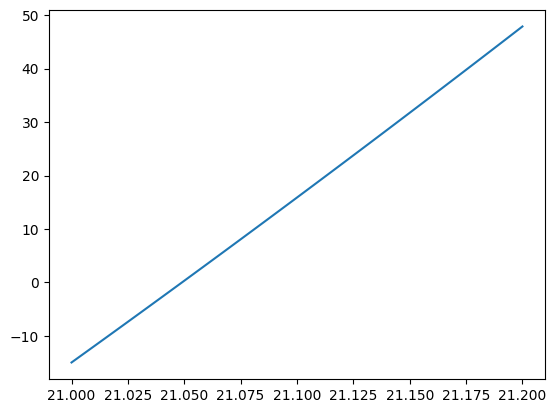

Bisection method: u plus =  21.0498046875 , No. iters =  10
Newton method: u plus =  21.0494251952156
Fix point method: u plus =  21.01908102946567
tau_wall is  1.2441367557267613


In [94]:
from math import exp, log

k = 0.41
B = 5.1
rho = 1.25
u = 21
v = 1.5e-5
y = 0.01

def f_u_plus(u_plus):
    # y_plus=y * u / (v * u_plus), u_plus != 0
    return u_plus + exp(-k * B) * (exp(k * u_plus) - 1 - k * u_plus - 1/2 * pow(k*u_plus, 2) -
                                   1/6 * pow(k*u_plus, 3) - 1/24 * pow(k*u_plus, 4)) - y * u / (v * u_plus)

def df_u_plus(u_plus):
    return 1 + exp(-k * B) * (k * exp(k * u_plus) - k - k*k*u_plus - k/2 * pow(k*u_plus, 2) -
                              k/6 * pow(k*u_plus, 3)) + y * u / (v*pow(u_plus, 2))

f_numpy = np.vectorize(f_u_plus)
x = np.linspace(21, 21.2, num=100)
value = f_numpy(x)

plt.plot(x, value)
plt.show()

root_finder = RootFinder(f_u_plus)
u_star, n = root_finder.bisect(21, 22, 0.001)
print("Bisection method: u plus = ", u_star, ", No. iters = ", n)
u_star = root_finder.newton(df_u_plus, 21, 22, 0.001)
print("Newton method: u plus = ", u_star)

tau_wall = pow(u/u_star, 2) * rho

def f_fix_point(u_plus):
    return log((y * u / (v * u_plus) - u_plus) / exp(-k * B) + 1 + k * u_plus - 1 / 2 * pow(k * u_plus, 2)
               + 1 / 6 * pow(k * u_plus, 3) + 1 / 24 * pow(k * u_plus, 4)) / k

fix_point_finder = RootFinder(f_fix_point)
u_star = fix_point_finder.fix_point(21, 0.001)
print("Fix point method: u plus = ", u_star)
print("tau_wall is ", tau_wall)

so the final $\tau_{wall}=1.2441$, using fix point formula as below:

$$
U_+ = g(U_+) = ln((y_+ + U_+)e^{kB} + 1 + kU_+ + \frac12(kU_+)^2 + \frac16(kU_+)^3 + \frac{1}{24}(kU_+)^4) / k
$$

## 4. Interpolation

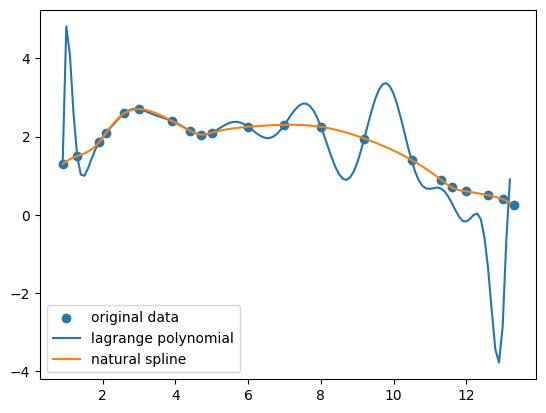

In [97]:
from scipy.interpolate import lagrange
from scipy.interpolate import CubicSpline
from numpy.polynomial.polynomial import Polynomial

points = np.array([
    [0.9, 1.3],
    [1.3, 1.5],
    [1.9, 1.85],
    [2.1, 2.1],
    [2.6, 2.6],
    [3.0, 2.7],
    [3.9, 2.4],
    [4.4, 2.15],
    [4.7, 2.05],
    [5.0, 2.1],
    [6.0, 2.25],
    [7.0, 2.3],
    [8.0, 2.25],
    [9.2, 1.95],
    [10.5, 1.4],
    [11.3, 0.9],
    [11.6, 0.7],
    [12.0, 0.6],
    [12.6, 0.5],
    [13.0, 0.4],
    [13.3, 0.25]
])

# lagrange from scipy
poly = lagrange(points[:, 0], points[:, 1])
coefficient = Polynomial(poly.coef[::-1]).coef

# cubic spline from scipy
spline = CubicSpline(points[:, 0], points[:, 1])

x_new = np.arange(0.9, 13.3, 0.1)
plt.scatter(points[:, 0], points[:, 1], label='original data')
plt.plot(x_new, Polynomial(poly.coef[::-1])(x_new), label='lagrange polynomial')
plt.plot(x_new, spline(x_new), label='natural spline')
plt.legend()
plt.show()